# Recommendation system for user in Spotify

https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation?select=good.json

## Loading libraries and data

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier)
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             precision_score)



In [4]:
path = 'drive/MyDrive/datasets/spotify-recsys/'

df = pd.read_csv(path + 'data.csv')
like = pd.read_json(path + 'good.json')
dislike = pd.read_json(path + 'dislike.json')

In [5]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


## Data Visualization

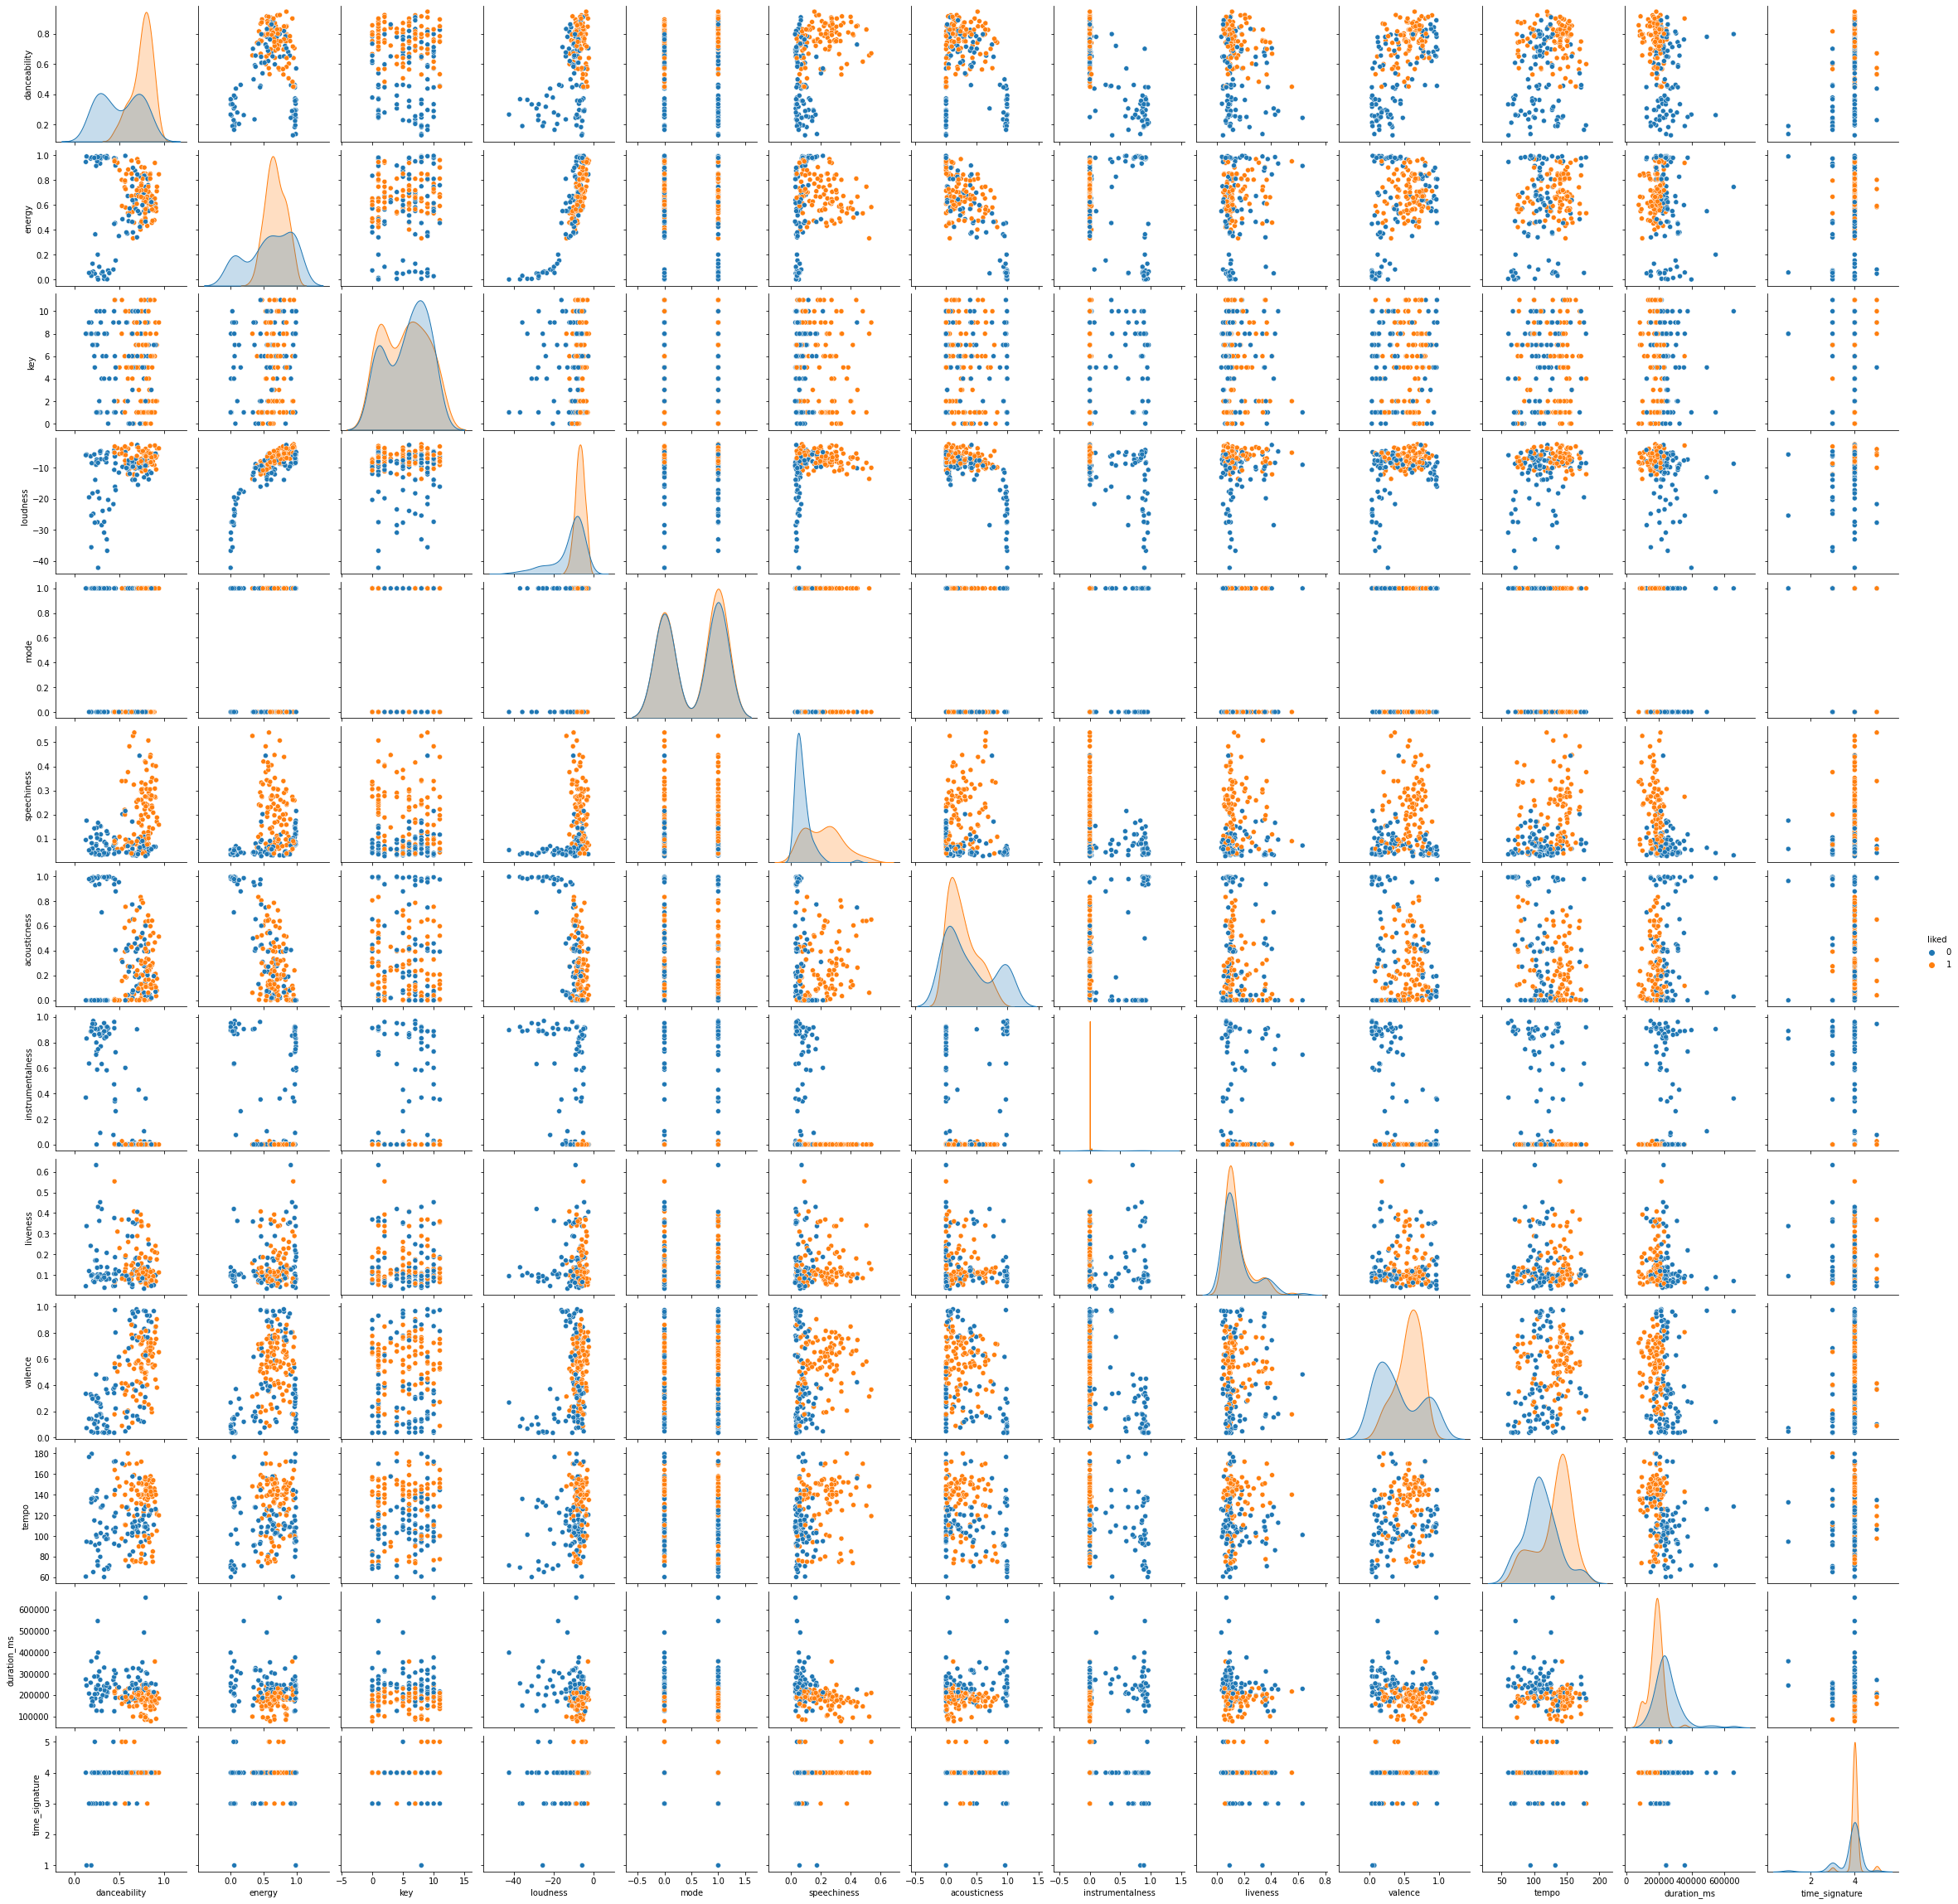

In [14]:
sns.pairplot(df, hue = 'liked')

In [24]:
X = df.drop('liked', axis = 1)
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(X)

In [25]:
X_embedded = pd.DataFrame(X_embedded)
X_embedded.columns = ['x1','x2']
X_embedded

,x1,x2
0,-62.257389,-16.453379
1,-10.430454,-44.345757
2,-48.559589,38.877937
3,30.497520,6.122476
4,-28.344906,34.454861
...,...,...
190,33.146019,0.624903
191,-33.969112,-42.883888
192,3.504708,-16.469652
193,-53.309990,15.319937


[Text(0.5, 1.0, 'Music T-SNE projection')]

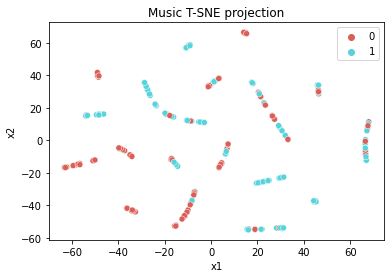

In [28]:
sns.scatterplot(x="x1", y="x2", hue=df.liked.tolist(),
                palette=sns.color_palette("hls", 2),
                data=X_embedded).set(title="Music T-SNE projection") 

## Data Preparation

In [75]:
x = df.drop("liked", axis = 1)
y = df["liked"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42,
                                                    test_size = 0.2)

In [76]:
y_train.value_counts()

1    80
0    76
Name: liked, dtype: int64

In [77]:
y_test.value_counts()

1    20
0    19
Name: liked, dtype: int64

In [78]:
x_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5,0.778,0.6320,8,-6.415,1,0.1250,0.040400,0.000000,0.0912,0.8270,140.951,224029,4
135,0.230,0.0487,5,-27.675,1,0.0412,0.986000,0.945000,0.0679,0.1010,134.839,203656,5
122,0.784,0.9020,11,-5.308,0,0.0434,0.003080,0.000233,0.1300,0.2710,100.007,186041,4
167,0.335,0.0287,10,-27.400,1,0.0410,0.991000,0.888000,0.0874,0.0371,67.446,328000,4
85,0.779,0.7050,4,-7.834,0,0.0827,0.277000,0.000000,0.0804,0.2280,103.048,233597,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.290,0.9340,10,-4.679,0,0.0962,0.000325,0.853000,0.4530,0.1800,112.834,225867,3
14,0.640,0.9570,8,-2.336,1,0.0741,0.043100,0.000000,0.0789,0.6920,134.992,178013,4
92,0.798,0.5640,2,-5.980,1,0.0470,0.230000,0.000018,0.1830,0.3940,108.004,254218,4
179,0.767,0.6590,7,-4.541,1,0.0387,0.785000,0.000000,0.1120,0.6310,90.056,186720,4


In [79]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns = x.columns)

## Machine Learning

### Clustering

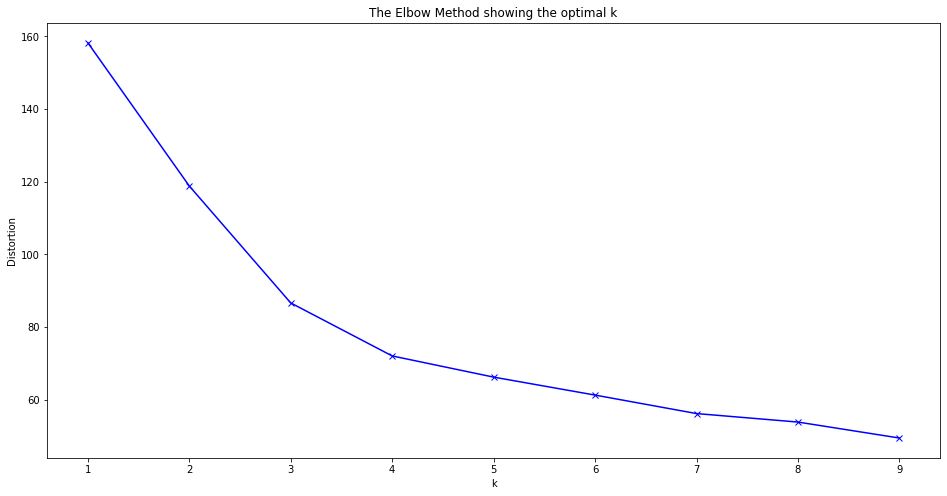

In [81]:
distortions = []
K = range(1,10)

for n_clusters in K:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(x_train) 
  distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(x_train)

x_train['labels'] = kmeans.labels_
x_test['labels'] = kmeans.predict(x_test)

x_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,labels
0,0.792079,0.633655,0.727273,0.897833,1.0,0.189770,0.040600,0.000000,0.111538,0.838044,0.660169,0.313367,0.75,0
1,0.113861,0.046598,0.454545,0.365335,1.0,0.026162,0.990955,0.975232,0.066807,0.069546,0.607027,0.269885,1.00,2
2,0.799505,0.905395,1.000000,0.925560,0.0,0.030457,0.003092,0.000240,0.186024,0.249497,0.304174,0.232290,0.75,1
3,0.243812,0.026469,0.909091,0.372223,1.0,0.025771,0.995980,0.916409,0.104243,0.001905,0.021067,0.535269,0.75,2
4,0.793317,0.707126,0.363636,0.862292,0.0,0.107185,0.278390,0.000000,0.090804,0.203980,0.330615,0.333787,0.75,1


In [85]:
x_test.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,labels
0,0.242574,0.004952,0.363636,0.284358,0.0,0.015033,0.995980,0.982456,0.122288,0.064677,-0.042187,0.351694,0.75,2
1,0.881188,0.856079,0.727273,0.916994,1.0,0.185865,0.015575,0.000000,0.138030,0.739600,0.669550,0.127412,0.75,0
2,0.695545,0.721216,0.454545,0.905222,1.0,0.121437,0.728642,0.000000,0.159148,0.416746,0.686427,0.153262,0.75,0
3,0.856436,0.613527,0.909091,0.872010,0.0,0.099961,0.112560,0.000000,0.107698,0.229385,0.286628,0.355896,0.75,1
4,0.759901,0.468599,0.000000,0.808892,1.0,0.595861,0.809045,0.000000,0.197543,0.720546,0.154522,0.217802,0.75,0


### Fitting Models

In [86]:
models = [
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    XGBClassifier()
]

results = {}

for model in models:
  model_name = type(model).__name__

  model.fit(x_train, y_train)
  predict = model.predict(x_test)

  accuracy = accuracy_score(y_test, predict)
  precision = precision_score(y_test, predict)
  recall = recall_score(y_test, predict)

  results[model_name] = {
      'accuracy' : accuracy,
      'precision' : precision,
      'recall' : recall
      }

results = pd.DataFrame(results).T
results

,accuracy,precision,recall
SVC,0.846154,0.850000,0.85
LogisticRegression,0.846154,0.818182,0.90
RandomForestClassifier,0.923077,0.904762,0.95
GradientBoostingClassifier,0.923077,0.947368,0.90
GaussianNB,0.846154,0.769231,1.00
XGBClassifier,0.897436,0.944444,0.85
